In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

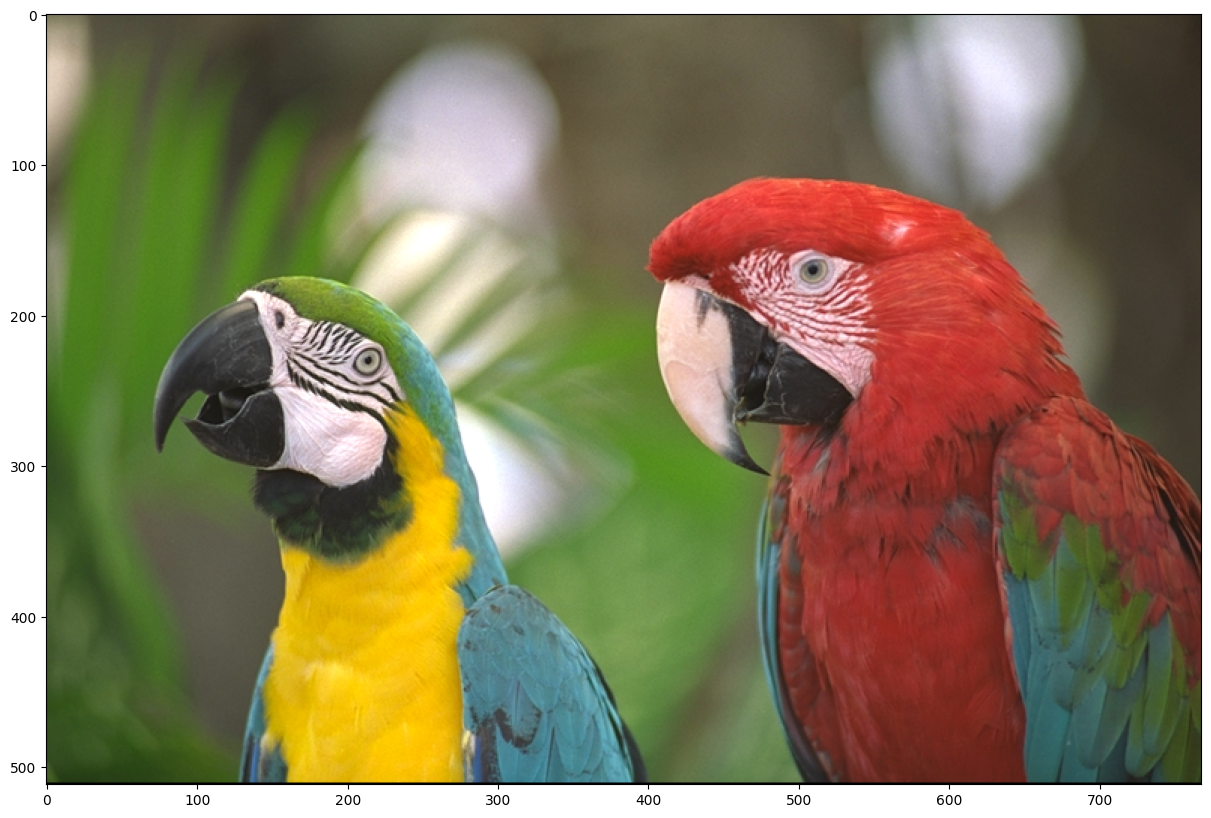

In [2]:
img = cv2.imread('../data/kodim23.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<class 'numpy.float32'>
Средняя ошибка квантования: 32.7578


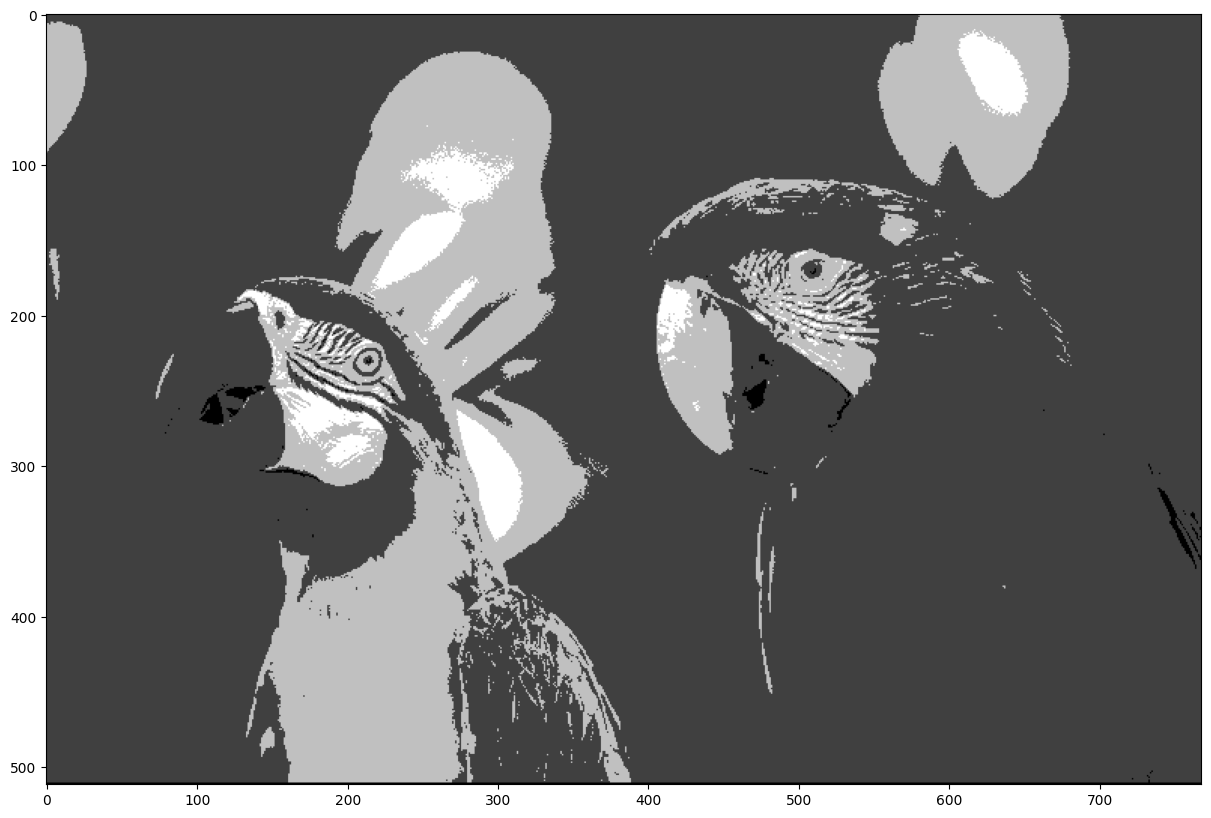

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])
#Using the colour pallette, let's quantize the original image.
# Cast the image to float
img = img.astype(np.float32)
print(type(img[1][1][1]))
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel.astype(np.uint8)

# Compute average quantization error
avg_quant_error = np.mean(np.abs(img - quantized))
print(f"Средняя ошибка квантования: {avg_quant_error:.4f}")
#print(f"Средняя ошибка квантования: {error}")
plt.imshow(quantized.astype(np.uint8))

In [4]:
#Floyd-Steinberg Dithering

In [5]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
print(type(img[1][1][1]))

print(type(img_tmp[1][1][1]))

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]      
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] += quant_error * 7/16
        img_tmp[r+1, c-1, :] += quant_error * 3/16
        img_tmp[r+1, c, :] += quant_error * 5/16
        img_tmp[r+1, c+1, :] += quant_error * 1/16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel



<class 'numpy.float32'>
<class 'numpy.float32'>


(<Axes: >, <matplotlib.image.AxesImage at 0x2560ceecf50>)

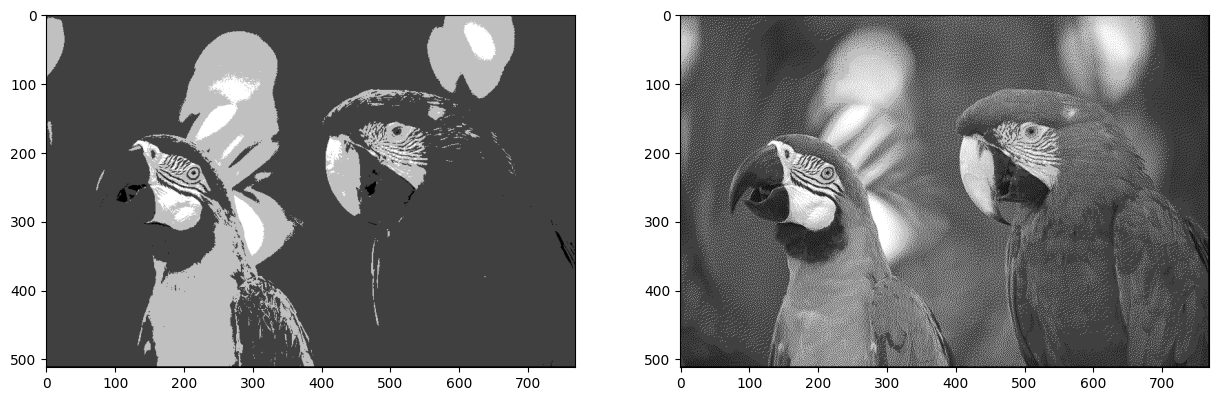

In [6]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [7]:
avg_dith_error = np.mean(np.abs(img - dithering))
print(f"Средняя ошибка квантования для изображения с дизерингом: {avg_dith_error:.4f}")

Средняя ошибка квантования для изображения с дизерингом: 41.8317


In [8]:
'''
Which image has higher quantization error? Optimally quantized or dithered?
    с дизерингом
Which image looks better to you?
    изображение с дизерингом выглядит визуально лучше'''

'\nWhich image has higher quantization error? Optimally quantized or dithered?\n    с дизерингом\nWhich image looks better to you?\n    изображение с дизерингом выглядит визуально лучше'

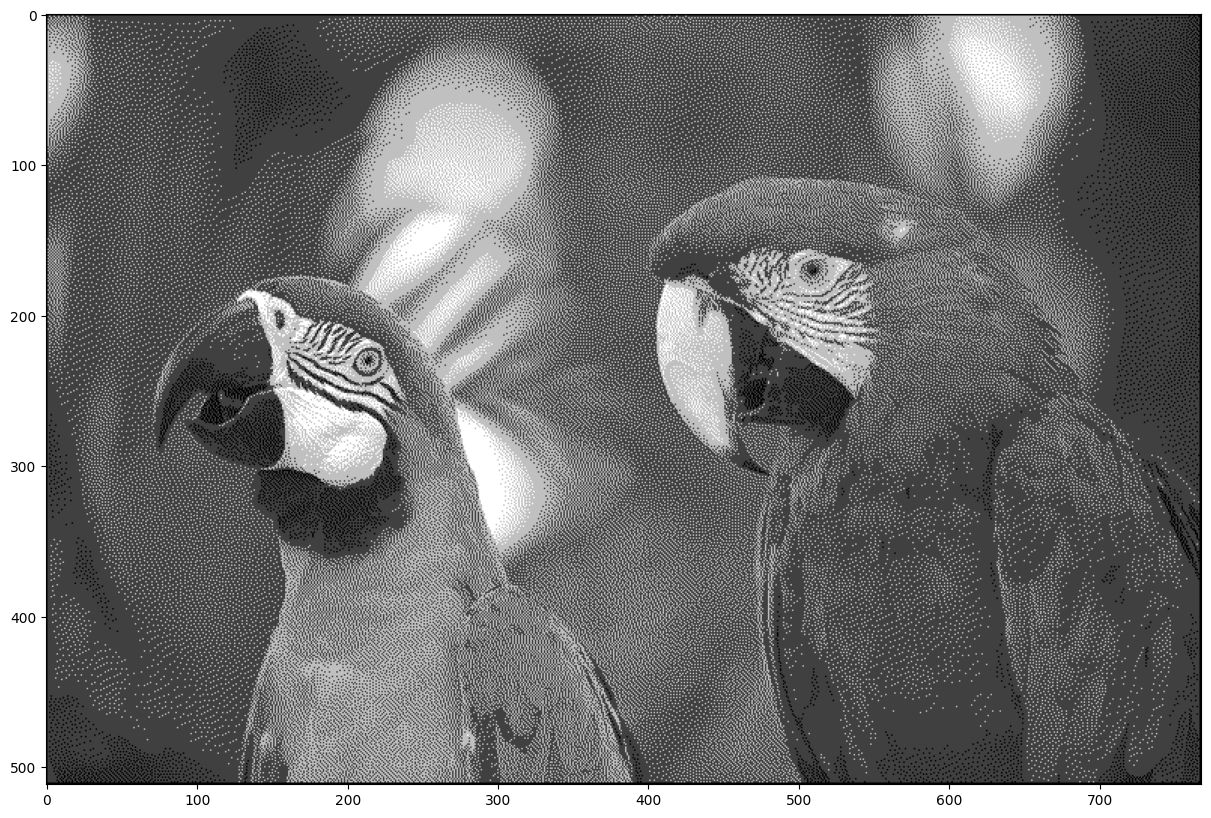

In [9]:
plt.imshow(dithering.astype(np.uint8))   # dithering

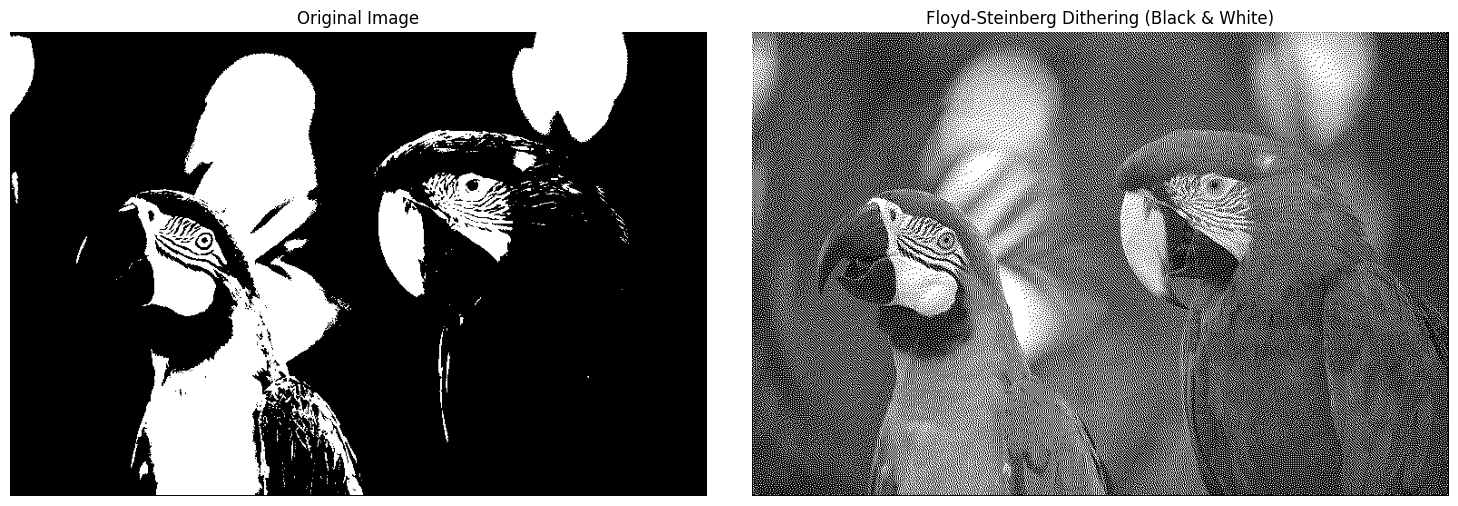

In [10]:
colors = np.array([[0, 0, 0],  # Black
                   [255, 255, 255]])  # White
ows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel.astype(np.uint8)

# Prepare for dithering
rows, cols, channels = img.shape
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Apply Floyd-Steinberg dithering
for r in range(rows-1):
    for c in range(cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]      
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        img_tmp[r, c+1, :] += quant_error * 7/16
        img_tmp[r+1, c-1, :] += quant_error * 3/16
        img_tmp[r+1, c, :] += quant_error * 5/16
        img_tmp[r+1, c+1, :] += quant_error * 1/16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(quantized.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(dithering.astype(np.uint8))
plt.title('Floyd-Steinberg Dithering (Black & White)')
plt.axis('off')

plt.tight_layout()
plt.show()

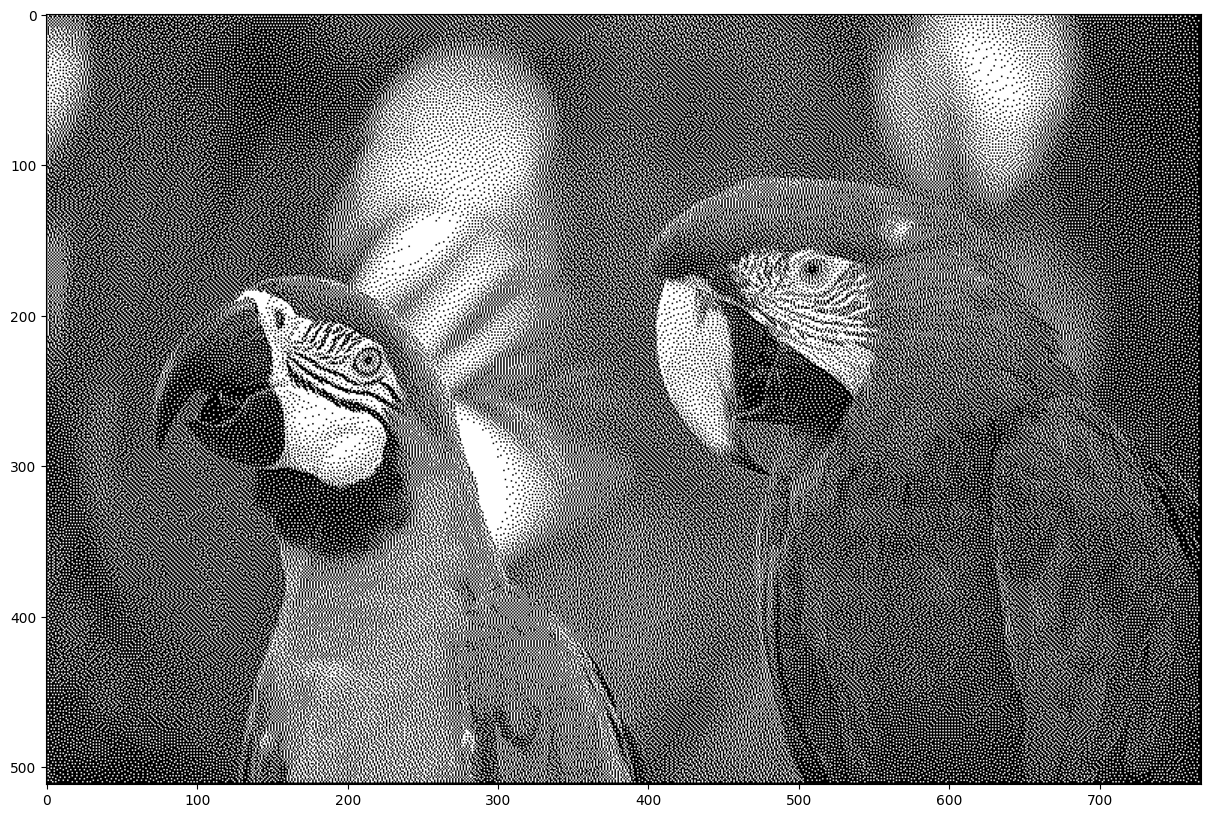

In [11]:
plt.imshow(dithering.astype(np.uint8))

In [12]:
from sklearn.cluster import KMeans

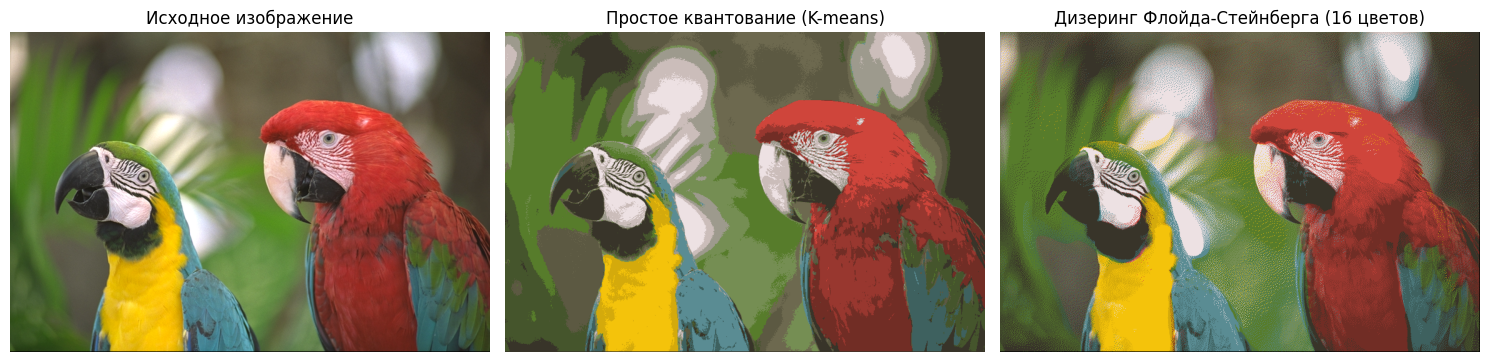

ValueError: array([207.49817 ,  69.40372 ,  59.214878], dtype=float32) is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

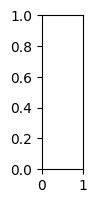

In [18]:
kmeans = KMeans(n_clusters=16, random_state=42).fit(img.reshape(-1, 3))
colors = kmeans.cluster_centers_

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel.astype(np.uint8)

# Подготовка к дизерингу
rows, cols, channels = img.shape
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Применяем дизеринг Флойда-Стейнберга
for r in range(rows-1):
    for c in range(cols-1):
        # Извлекаем значение исходного пикселя
        pixel = img_tmp[r, c, :]
        
        # Находим ближайший цвет из палитры
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]      
        
        # Вычисляем ошибку квантования
        quant_error = pixel - new_pixel
        
        # Распространяем ошибку квантования согласно матрице диффузии ФС
        img_tmp[r, c+1, :] += quant_error * 7/16
        img_tmp[r+1, c-1, :] += quant_error * 3/16
        img_tmp[r+1, c, :] += quant_error * 5/16
        img_tmp[r+1, c+1, :] += quant_error * 1/16
        
        # Применяем дизеринг
        dithering[r, c, :] = new_pixel

plt.subplot(131)
plt.imshow(img.astype(np.uint8))
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(132)
plt.imshow(quantized.astype(np.uint8))
plt.title('Простое квантование (K-means)')
plt.axis('off')

plt.subplot(133)
plt.imshow(dithering.astype(np.uint8))
plt.title('Дизеринг Флойда-Стейнберга (16 цветов)')
plt.axis('off')

plt.tight_layout()
plt.show()

